Submission for the WiDs Datathon 2022
More information here: https://www.kaggle.com/c/widsdatathon2022/overview

# Data Overview
The WiDS Datathon 2022 focuses on a prediction task involving roughly 100k observations of building energy usage records collected over 7 years and a number of states within the United States. The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. Your task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building. 

# Notebook Overview:
1. Importing required libraries and reading datasets
2. Data Cleaning
      * 2.1 Examining climate features
                i) Temperatures
                ii) Precipitation and snowfall
      * 2.2 Building atttributes
3. Exploratory Data Analysis
4. Model Preprocessing
5. Model Building
6. Evaluation
        

# 1. Importing required libraries and reading datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv(r'C:\Users\bccpe\Documents\wids\train.csv',header=[0])
test= pd.read_csv(r'C:\Users\bccpe\Documents\wids\test.csv',header=[0])
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


 We create a validation set which will be used to evaluate models. The new train data will be used to check data distributions to prevent leakage

In [3]:
from sklearn.model_selection import train_test_split
                                                                    
train, val = train_test_split(train, random_state=42, test_size=0.1) 

In [4]:
train['set']=['train']*len(train)
val['set']=['val']*len(val)
test['set']=['test']*len(test)

In [5]:
data=pd.concat([train,val,test],axis=0)


In [6]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,68181.000000,6.818100e+04,66518.000000,44120.000000,68181.000000,68181.000000,68181.000000,68181.000000,68181.000000,68181.000000,...,68181.000000,68181.000000,68181.000000,68181.000000,31160.000000,30497.000000,31160.000000,26957.000000,68181.000000,68181.000000
mean,4.368138,1.656863e+05,1952.277970,61.038055,39.443063,11.443584,34.320136,59.065649,11.730658,35.539703,...,82.723647,14.072777,0.281413,0.002464,66.410655,62.585238,4.185863,109.138962,82.539225,37861.091154
std,1.471593,2.455663e+05,36.701928,28.642353,60.777854,9.382101,6.999289,5.361491,12.577462,8.868161,...,25.296486,10.954215,2.248625,0.144499,131.026179,130.143274,6.457079,50.613141,58.122484,21873.499823
min,1.000000,9.430000e+02,0.000000,1.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.235000e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.523363,18919.000000
50%,5.000000,9.117000e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37831.000000
75%,6.000000,1.658380e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.221817,56812.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,90.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68181 entries, 57703 to 15795
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                68181 non-null  int64  
 1   State_Factor               68181 non-null  object 
 2   building_class             68181 non-null  object 
 3   facility_type              68181 non-null  object 
 4   floor_area                 68181 non-null  float64
 5   year_built                 66518 non-null  float64
 6   energy_star_rating         44120 non-null  float64
 7   ELEVATION                  68181 non-null  float64
 8   january_min_temp           68181 non-null  int64  
 9   january_avg_temp           68181 non-null  float64
 10  january_max_temp           68181 non-null  int64  
 11  february_min_temp          68181 non-null  int64  
 12  february_avg_temp          68181 non-null  float64
 13  february_max_temp          68181 non-null 

In [8]:
data.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

* Building attributes: State_factor, building_class, facility_type, floor_area, year_built, energy_star_rating, ELEVATION
* Climate attributes:
     * General: 'Year_Factor'
     * Temperature: 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp','avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F','cooling_degree_days',
       'heating_degree_days'
     * Precipitation: 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches'
     * Wind Speed and fog: 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'

# 2. Data Cleaning

Checking for missing and duplicate values

In [9]:
data.isnull().sum().sort_values(ascending=False).head(10)

days_with_fog                54913
direction_peak_wind_speed    50386
max_wind_speed               49657
direction_max_wind_speed     49657
energy_star_rating           28963
site_eui                      9705
year_built                    1929
Year_Factor                      0
december_min_temp                0
heating_degree_days              0
dtype: int64

<AxesSubplot:>

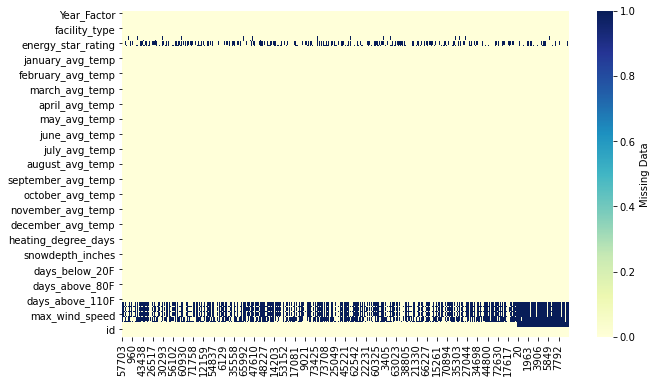

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

days_with_fog, direction_peak_wind_speed, direction_max_wind_speed, max_wind_speed all have a high number of null values so we will drop these columns

In [11]:
cols_to_be_dropped=['days_with_fog','direction_peak_wind_speed','direction_max_wind_speed','max_wind_speed']
data_updated=data.drop(cols_to_be_dropped,axis=1)

Let us check the distribution and characteristics of the year_built feature to see how we can best impute the null values

In [12]:
data_updated['year_built'].unique()

array([1927., 1964., 1960., 1989., 2010., 1928., 1936., 1965., 1914.,
       1983., 1920., 1929., 1937., 1910.,   nan, 1997., 1903., 1952.,
       1954., 2009., 2013., 1926., 1948., 1911., 1912., 1923., 1959.,
       1982., 1925., 1999., 1900., 1994., 1985., 1939., 1955., 1956.,
       1961., 1990., 1931., 1953., 1987., 2007., 2006., 2000., 1930.,
       1963., 1969., 1951., 1909., 1908., 2003., 1991., 1940., 1962.,
       1995., 1942., 1978., 1924., 2002., 1986., 1967., 1922., 1916.,
       1913., 1974., 1933., 1988., 1932., 1915., 2004., 1992., 1902.,
       1950., 1905., 1957., 1907., 1890., 1968., 1880., 1975., 1980.,
       1947., 1906., 1993., 1941., 1981., 1958., 1972., 1970., 1966.,
       1938., 1918., 1949., 2011., 2014., 1935., 1934., 2008., 1917.,
       1973., 1971., 1998., 1976., 1895., 1977., 2001., 1877., 1996.,
       1649., 1945., 1984., 1894., 2015., 1921., 1865., 2012., 1889.,
       1873., 2005., 1901., 1979., 1892., 1919., 1898., 1904., 1943.,
       1944., 1899.,

The value 0 is included as a year, which cannot be possible.

In [13]:
year_0=data_updated[data_updated['year_built']==0]

In [14]:
len(year_0)

7

(array([5.0000e+00, 4.0000e+00, 0.0000e+00, 5.0000e+00, 8.0000e+00,
        7.0000e+01, 5.7600e+02, 2.6413e+04, 2.3434e+04, 1.5998e+04]),
 array([1600. , 1642.2, 1684.4, 1726.6, 1768.8, 1811. , 1853.2, 1895.4,
        1937.6, 1979.8, 2022. ]),
 <BarContainer object of 10 artists>)

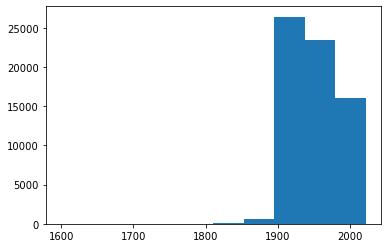

In [15]:
plt.hist(train['year_built'], range=(1600,2022)) # setting the range so that we exclude 0

Most values for year seem to be around the early 1900s with a few outliers in the early 1800s. We will impute the values with the median since it is more robust to outliers, as well replce the zeros

In [16]:
data_updated['year_built']=data_updated['year_built'].fillna(data_updated['year_built'].median())
data_updated['year_built']=data_updated.replace({'year_built': {0: data_updated['year_built'].median()}})

Now let us examine energy_star_rating's realtionship to site eui to decide it should be dropped or not

C:\Users\bccpe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_star_rating', ylabel='site_eui'>

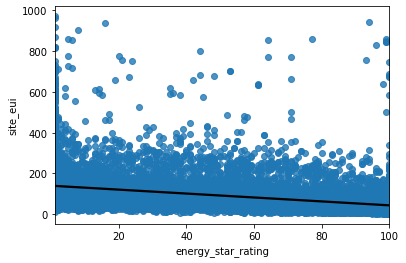

In [17]:
sns.regplot(train['energy_star_rating'],train['site_eui'],line_kws={"color": "black"})

The relationship seems ambigous, but we can see a soft bound of site_eui that decreases from 400 to 200 as energy_star_rating increases. This is expected as electricity consumption should decrease with a higher star rating. Since the feature has a high percentage of null values, simply imputing a vlaue would create a high bias. Thus, we can drop the feature or impute using an algorithm. We will drop the column for now, and come back to to compare

In [18]:
data_updated=data_updated.drop('energy_star_rating',axis=1)

### 2.1 Examining climate features
 ### i) Temperatures
 We can see that minimum, maximum, and average temperatures of each month are given. Each of these values are highly correlated with each other and since the average temperaure encapsulates information about the minimum and maximum, we shall remove these columns.

In [19]:
month_temp_extremes=['january_min_temp', 'january_max_temp', 'february_min_temp', 'february_max_temp', 'march_min_temp', 'march_max_temp', 'april_min_temp', 'april_max_temp', 'may_min_temp', 'may_max_temp', 'june_min_temp', 'june_max_temp', 'july_min_temp', 'july_max_temp', 'august_min_temp', 'august_max_temp', 'september_min_temp', 'september_max_temp', 'october_min_temp', 'october_max_temp', 'november_min_temp', 'november_max_temp', 'december_min_temp', 'december_max_temp']
data_updated=data_updated.drop(month_temp_extremes,axis=1)

In [20]:
temperature_features=['january_avg_temp','february_avg_temp','march_avg_temp','april_avg_temp','may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp','september_avg_temp','october_avg_temp','november_avg_temp','december_avg_temp','avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F','cooling_degree_days',
       'heating_degree_days','site_eui']

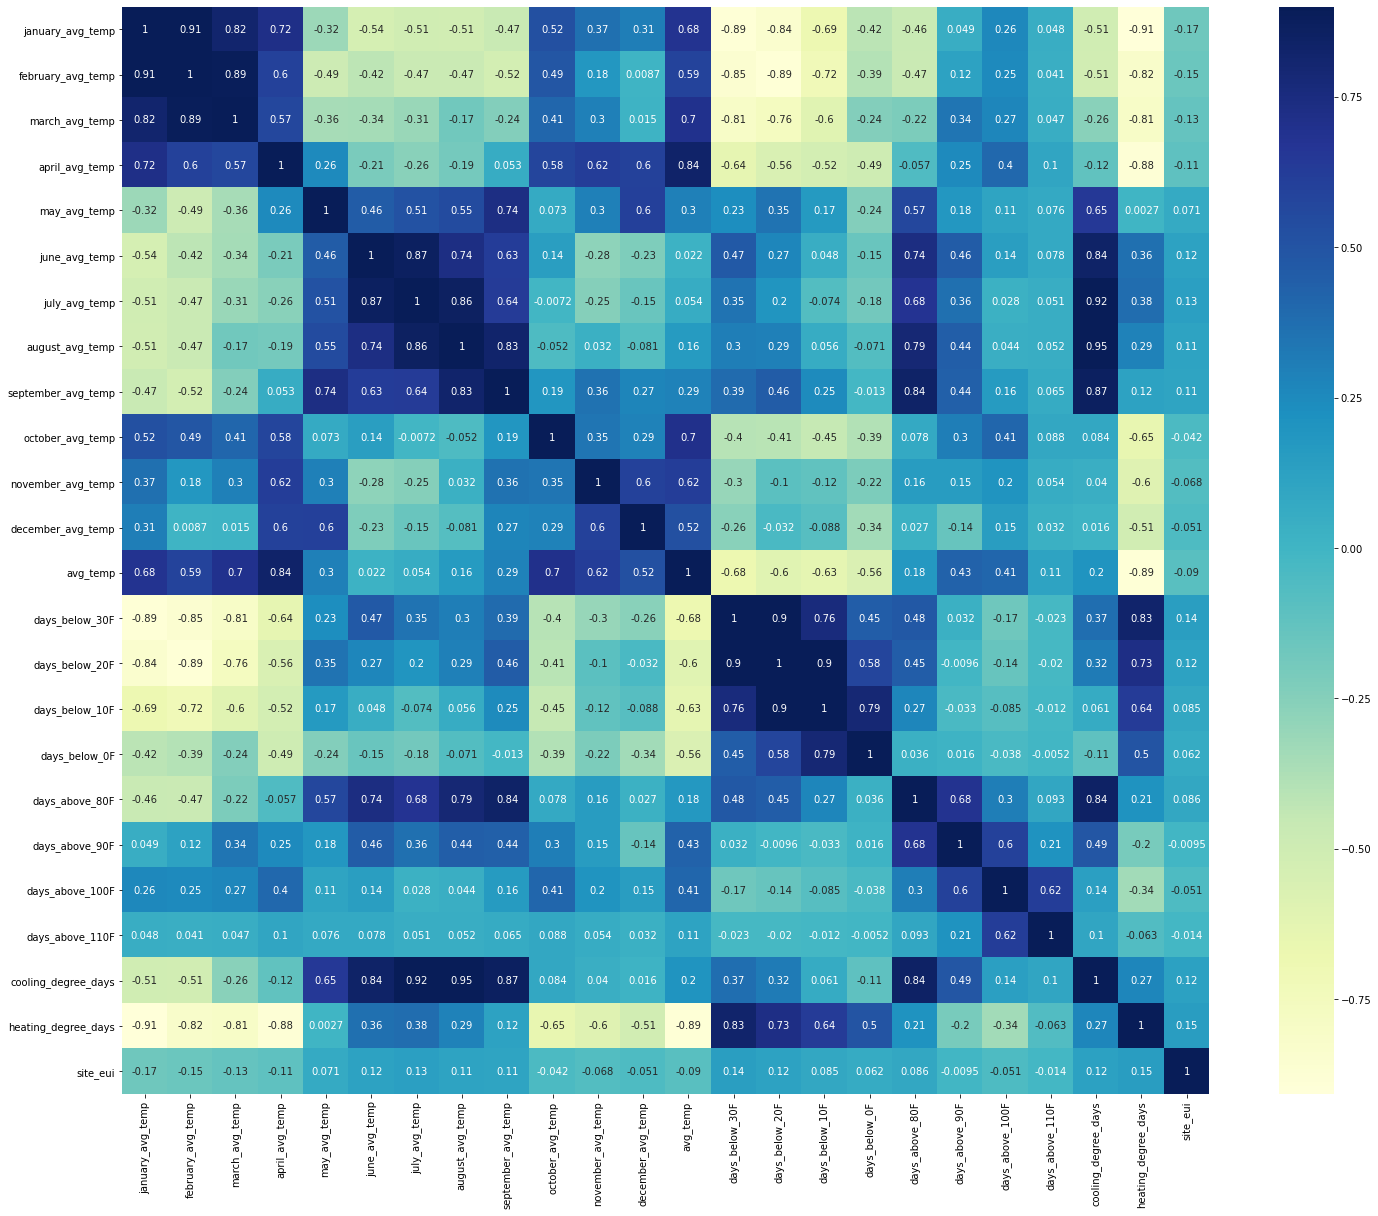

In [21]:
corr_matrix=train[temperature_features].corr() #
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr_matrix, vmax=.9, square=True,cmap="YlGnBu",annot=True);

Along the diagonal of the correlation matrix, we can see that there a few blocks of highly correlated features. The following observations are made:
 * The months that belong in one season all exhibit similar temperatures and high correlation. Eg. January, February, March and April.
 * The features that count the number of days above/below a certain temperature (eg. days_below_10F) have too many categories and are highly correlated with each other. 
 * cooling_degree_days and heating_degree days are highly correlated with the summer month tmeperatures and winter month temperatures respectively.
 
From these observations we create the following new features, and drop the rest:
* spring_avg_temp = average of temperatures of january, february, march,and april
* summer_fall_avg_temp = average of temperartures of may, june, july, august, and september
* winter_avg_temp = avg temperatures of october, november, and december
* extreme_cold_days = days_below_10F
* extreme_hot_days = days_above_100F

In [22]:
spring_temps= ['january_avg_temp','february_avg_temp','march_avg_temp','april_avg_temp']
summer_fall_temps=['may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp','september_avg_temp']
winter_temps=['october_avg_temp','november_avg_temp','december_avg_temp']
data_updated['spring_avg_temp'] = (data_updated[spring_temps].sum(axis=1)/4)
data_updated['summer_fall_avg_temp'] = (data_updated[summer_fall_temps].sum(axis=1)/5)
data_updated['winter_avg_temp'] = (data_updated[winter_temps].sum(axis=1)/3)

In [23]:
month_temps=['january_avg_temp','february_avg_temp','march_avg_temp','april_avg_temp','may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp','september_avg_temp','october_avg_temp','november_avg_temp','december_avg_temp']
data_updated=data_updated.drop(month_temps, axis=1)

In [24]:
days=['days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F']
data_updated['extreme_cold_days'] = data_updated['days_below_10F']
data_updated['extreme_hot_days'] = data_updated['days_above_100F']
data_updated=data_updated.drop(days, axis=1)


In [25]:
data_updated=data_updated.drop(['cooling_degree_days','heating_degree_days'],axis=1)

### ii) Precipitation and Snowfall


In [26]:
snowfall_and_precipitation=['precipitation_inches', 'snowfall_inches','snowdepth_inches']

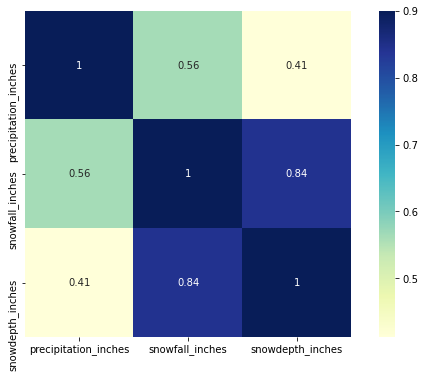

In [27]:
corr_matrix=train[snowfall_and_precipitation].corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, vmax=.9, square=True,cmap="YlGnBu",annot=True);

There is high correlation between the two snowfall variables so we drop one

In [28]:
data_updated=data_updated.drop('snowdepth_inches',axis=1)

### 2.2 Building attributes

Let's check the unique values for each of the categorical variables

In [29]:
data.building_class.unique()

array(['Residential', 'Commercial'], dtype=object)

In [30]:
data.State_Factor.unique()

array(['State_6', 'State_2', 'State_4', 'State_11', 'State_1', 'State_8',
       'State_10'], dtype=object)

In [31]:
data.Year_Factor.unique()

array([6, 5, 4, 2, 1, 3, 7], dtype=int64)

In [32]:
data.facility_type.unique()

array(['Multifamily_Uncategorized', 'Mixed_Use_Predominantly_Residential',
       'Lodging_Hotel', 'Office_Uncategorized',
       'Education_Other_classroom',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Uncategorized', 'Warehouse_Nonrefrigerated',
       'Food_Service_Other', '2to4_Unit_Building',
       'Warehouse_Selfstorage', 'Health_Care_Inpatient',
       'Public_Safety_Penitentiary', 'Commercial_Other',
       'Public_Assembly_Other', '5plus_Unit_Building',
       'Education_College_or_university',
       'Lodging_Dormitory_or_fraternity_sorority',
       'Retail_Vehicle_dealership_showroom',
       'Office_Medical_non_diagnostic',
       'Public_Safety_Fire_or_police_station',
       'Mixed_Use_Commercial_and_Residential',
       'Grocery_store_or_food_market', 'Industrial', 'Religious_worship',
       'Education_Uncategorized', 'Nursing_Home',
       'Warehouse_Uncategorized', 'Retail_Enclosed_mall',
       'Food_Service_Uncategorized', 'Commercial_Unknow

There are too many categories in the facility_type column. We will create broader catagories based on domain area to condense the values.

In [33]:
residential=['Lodging_Hotel','5plus_Unit_Building', 'Multifamily_Uncategorized','Lodging_Dormitory_or_fraternity_sorority','Lodging_Other','Mixed_Use_Predominantly_Residential','Lodging_Uncategorized',
       '2to4_Unit_Building']
service=['Service_Uncategorized','Service_Vehicle_service_repair_shop','Service_Drycleaning_or_Laundry']
misc=['Nursing_Home','Religious_worship', 'Mixed_Use_Commercial_and_Residential','Parking_Garage']
public=['Public_Assembly_Entertainment_culture','Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting','Public_Assembly_Recreation','Public_Assembly_Movie_Theater','Public_Assembly_Uncategorized','Public_Assembly_Library', 'Public_Safety_Uncategorized',
       'Public_Safety_Fire_or_police_station','Public_Assembly_Other', 'Public_Safety_Penitentiary','Public_Safety_Courthouse','Public_Assembly_Stadium']
commercial_industrial=['Office_Uncategorized','Commercial_Unknown','Data_Center', 'Commercial_Other','Mixed_Use_Predominantly_Commercial', 'Industrial','Office_Mixed_use','Office_Bank_or_other_financial']
health=['Office_Medical_non_diagnostic','Laboratory','Health_Care_Inpatient','Health_Care_Uncategorized','Health_Care_Outpatient_Clinic','Health_Care_Outpatient_Uncategorized']
education=['Education_Other_classroom','Education_College_or_university','Education_Uncategorized','Education_Preschool_or_daycare']
retail=['Retail_Enclosed_mall','Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized','Retail_Strip_shopping_mall']
warehouse=['Warehouse_Distribution_or_Shipping_center','Warehouse_Nonrefrigerated','Warehouse_Selfstorage','Warehouse_Refrigerated','Warehouse_Uncategorized']
food=['Grocery_store_or_food_market','Food_Service_Uncategorized','Food_Service_Other','Food_Service_Restaurant_or_cafeteria', 'Food_Sales']


In [34]:
rename_dict={'Lodging_Hotel':'residential','5plus_Unit_Building':'residential', 'Multifamily_Uncategorized':'residential','Lodging_Dormitory_or_fraternity_sorority':'residential','Lodging_Other':'residential','Mixed_Use_Predominantly_Residential':'residential','Lodging_Uncategorized':'residential',
       '2to4_Unit_Building':'residential','Service_Uncategorized':'service','Service_Vehicle_service_repair_shop':'service','Service_Drycleaning_or_Laundry':'service','Nursing_Home':'misc','Religious_worship':'misc', 'Mixed_Use_Commercial_and_Residential':'misc','Parking_Garage':'misc','Public_Assembly_Entertainment_culture':'public',
             'Public_Assembly_Drama_theater':'public', 'Public_Assembly_Social_meeting':'public','Public_Assembly_Recreation':'public','Public_Assembly_Movie_Theater':'public','Public_Assembly_Uncategorized':'public','Public_Assembly_Library':'public', 'Public_Safety_Uncategorized':'public',
            'Public_Safety_Fire_or_police_station':'public','Public_Assembly_Other':'public', 'Public_Safety_Penitentiary':'public','Public_Safety_Courthouse':'public','Public_Assembly_Stadium':'public','Office_Uncategorized':'commercial_industrial','Commercial_Unknown':'commercial_industrial','Data_Center':'commercial_industrial', 'Commercial_Other':'commercial_industrial','Mixed_Use_Predominantly_Commercial':'commercial_industrial', 'Industrial':'commercial_industrial',
             'Office_Mixed_use':'commercial_industrial','Office_Bank_or_other_financial':'commercial_industrial','Office_Medical_non_diagnostic':'health'
             ,'Laboratory':'health','Health_Care_Inpatient':'health','Health_Care_Uncategorized':'health','Health_Care_Outpatient_Clinic':'health','Health_Care_Outpatient_Uncategorized':'health','Education_Other_classroom':'education','Education_College_or_university':'education','Education_Uncategorized':'education','Education_Preschool_or_daycare':'education',
            'Retail_Enclosed_mall':'retail','Retail_Vehicle_dealership_showroom':'retail', 'Retail_Uncategorized':'retail','Retail_Strip_shopping_mall':'retail','Warehouse_Distribution_or_Shipping_center':'warehouse','Warehouse_Nonrefrigerated':'warehouse','Warehouse_Selfstorage':'warehouse','Warehouse_Refrigerated':'warehouse','Warehouse_Uncategorized':'warehouse',
            'Grocery_store_or_food_market':'food','Food_Service_Uncategorized':'food','Food_Service_Other':'food','Food_Service_Restaurant_or_cafeteria':'food', 'Food_Sales':'food'}

In [35]:
data_updated['facility_type'].replace(rename_dict, inplace=True)

In [36]:
data_updated

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,precipitation_inches,snowfall_inches,avg_temp,site_eui,id,set,spring_avg_temp,summer_fall_avg_temp,winter_avg_temp,extreme_cold_days,extreme_hot_days
57703,6,State_6,Residential,residential,72888.0,6,42.7,42.17,36.0,57.215847,87.959016,57703,train,43.590703,72.939032,48.954480,2,0
9069,5,State_2,Residential,residential,108616.0,5,44.2,43.61,14.8,56.427954,77.609285,9069,train,37.203193,74.101264,51.985714,14,0
34408,4,State_6,Residential,residential,147088.0,4,3.4,53.79,50.0,54.501370,74.003361,34408,train,37.554099,71.368925,48.481720,7,0
49532,5,State_6,Residential,residential,50714.0,5,42.7,40.97,49.1,56.835616,104.105928,49532,train,36.537010,74.381505,53.868638,9,0
44489,5,State_6,Commercial,residential,167532.0,5,3.4,40.97,49.1,56.835616,109.371312,44489,train,36.537010,74.381505,53.868638,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,State_11,Residential,residential,305925.0,7,812.0,44.83,4.0,53.420548,NaN,85457,test,44.404906,64.464194,46.775448,0,0
9701,7,State_11,Residential,residential,34909.0,7,26.5,44.83,4.0,53.420548,NaN,85458,test,44.404906,64.464194,46.775448,0,0
9702,7,State_11,Residential,residential,42393.0,7,812.0,44.83,4.0,53.420548,NaN,85459,test,44.404906,64.464194,46.775448,0,0
9703,7,State_11,Residential,residential,25368.0,7,812.0,44.83,4.0,53.420548,NaN,85460,test,44.404906,64.464194,46.775448,0,0


* next: split into train,val, and test, do some eda and outlier detection
* preprocess: dummies, one hot encoding

# 3. Exploratory Data Analysis

In [37]:
data_updated.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'ELEVATION', 'precipitation_inches',
       'snowfall_inches', 'avg_temp', 'site_eui', 'id', 'set',
       'spring_avg_temp', 'summer_fall_avg_temp', 'winter_avg_temp',
       'extreme_cold_days', 'extreme_hot_days'],
      dtype='object')

In [38]:
categorical=['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
numerical=['floor_area', 'year_built', 'ELEVATION', 'precipitation_inches',
       'snowfall_inches', 'avg_temp',
       'spring_avg_temp', 'summer_fall_avg_temp', 'winter_avg_temp',
       'extreme_cold_days', 'extreme_hot_days','site_eui']

In [39]:
train_eda= data_updated[data_updated['set']=='train']

<AxesSubplot:xlabel='site_eui', ylabel='Count'>

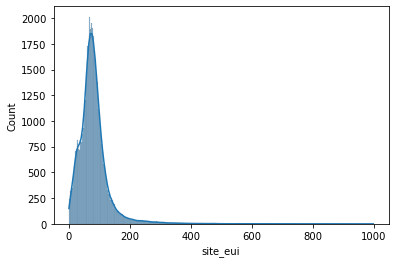

In [40]:
sns.histplot(train['site_eui'],kde=True)

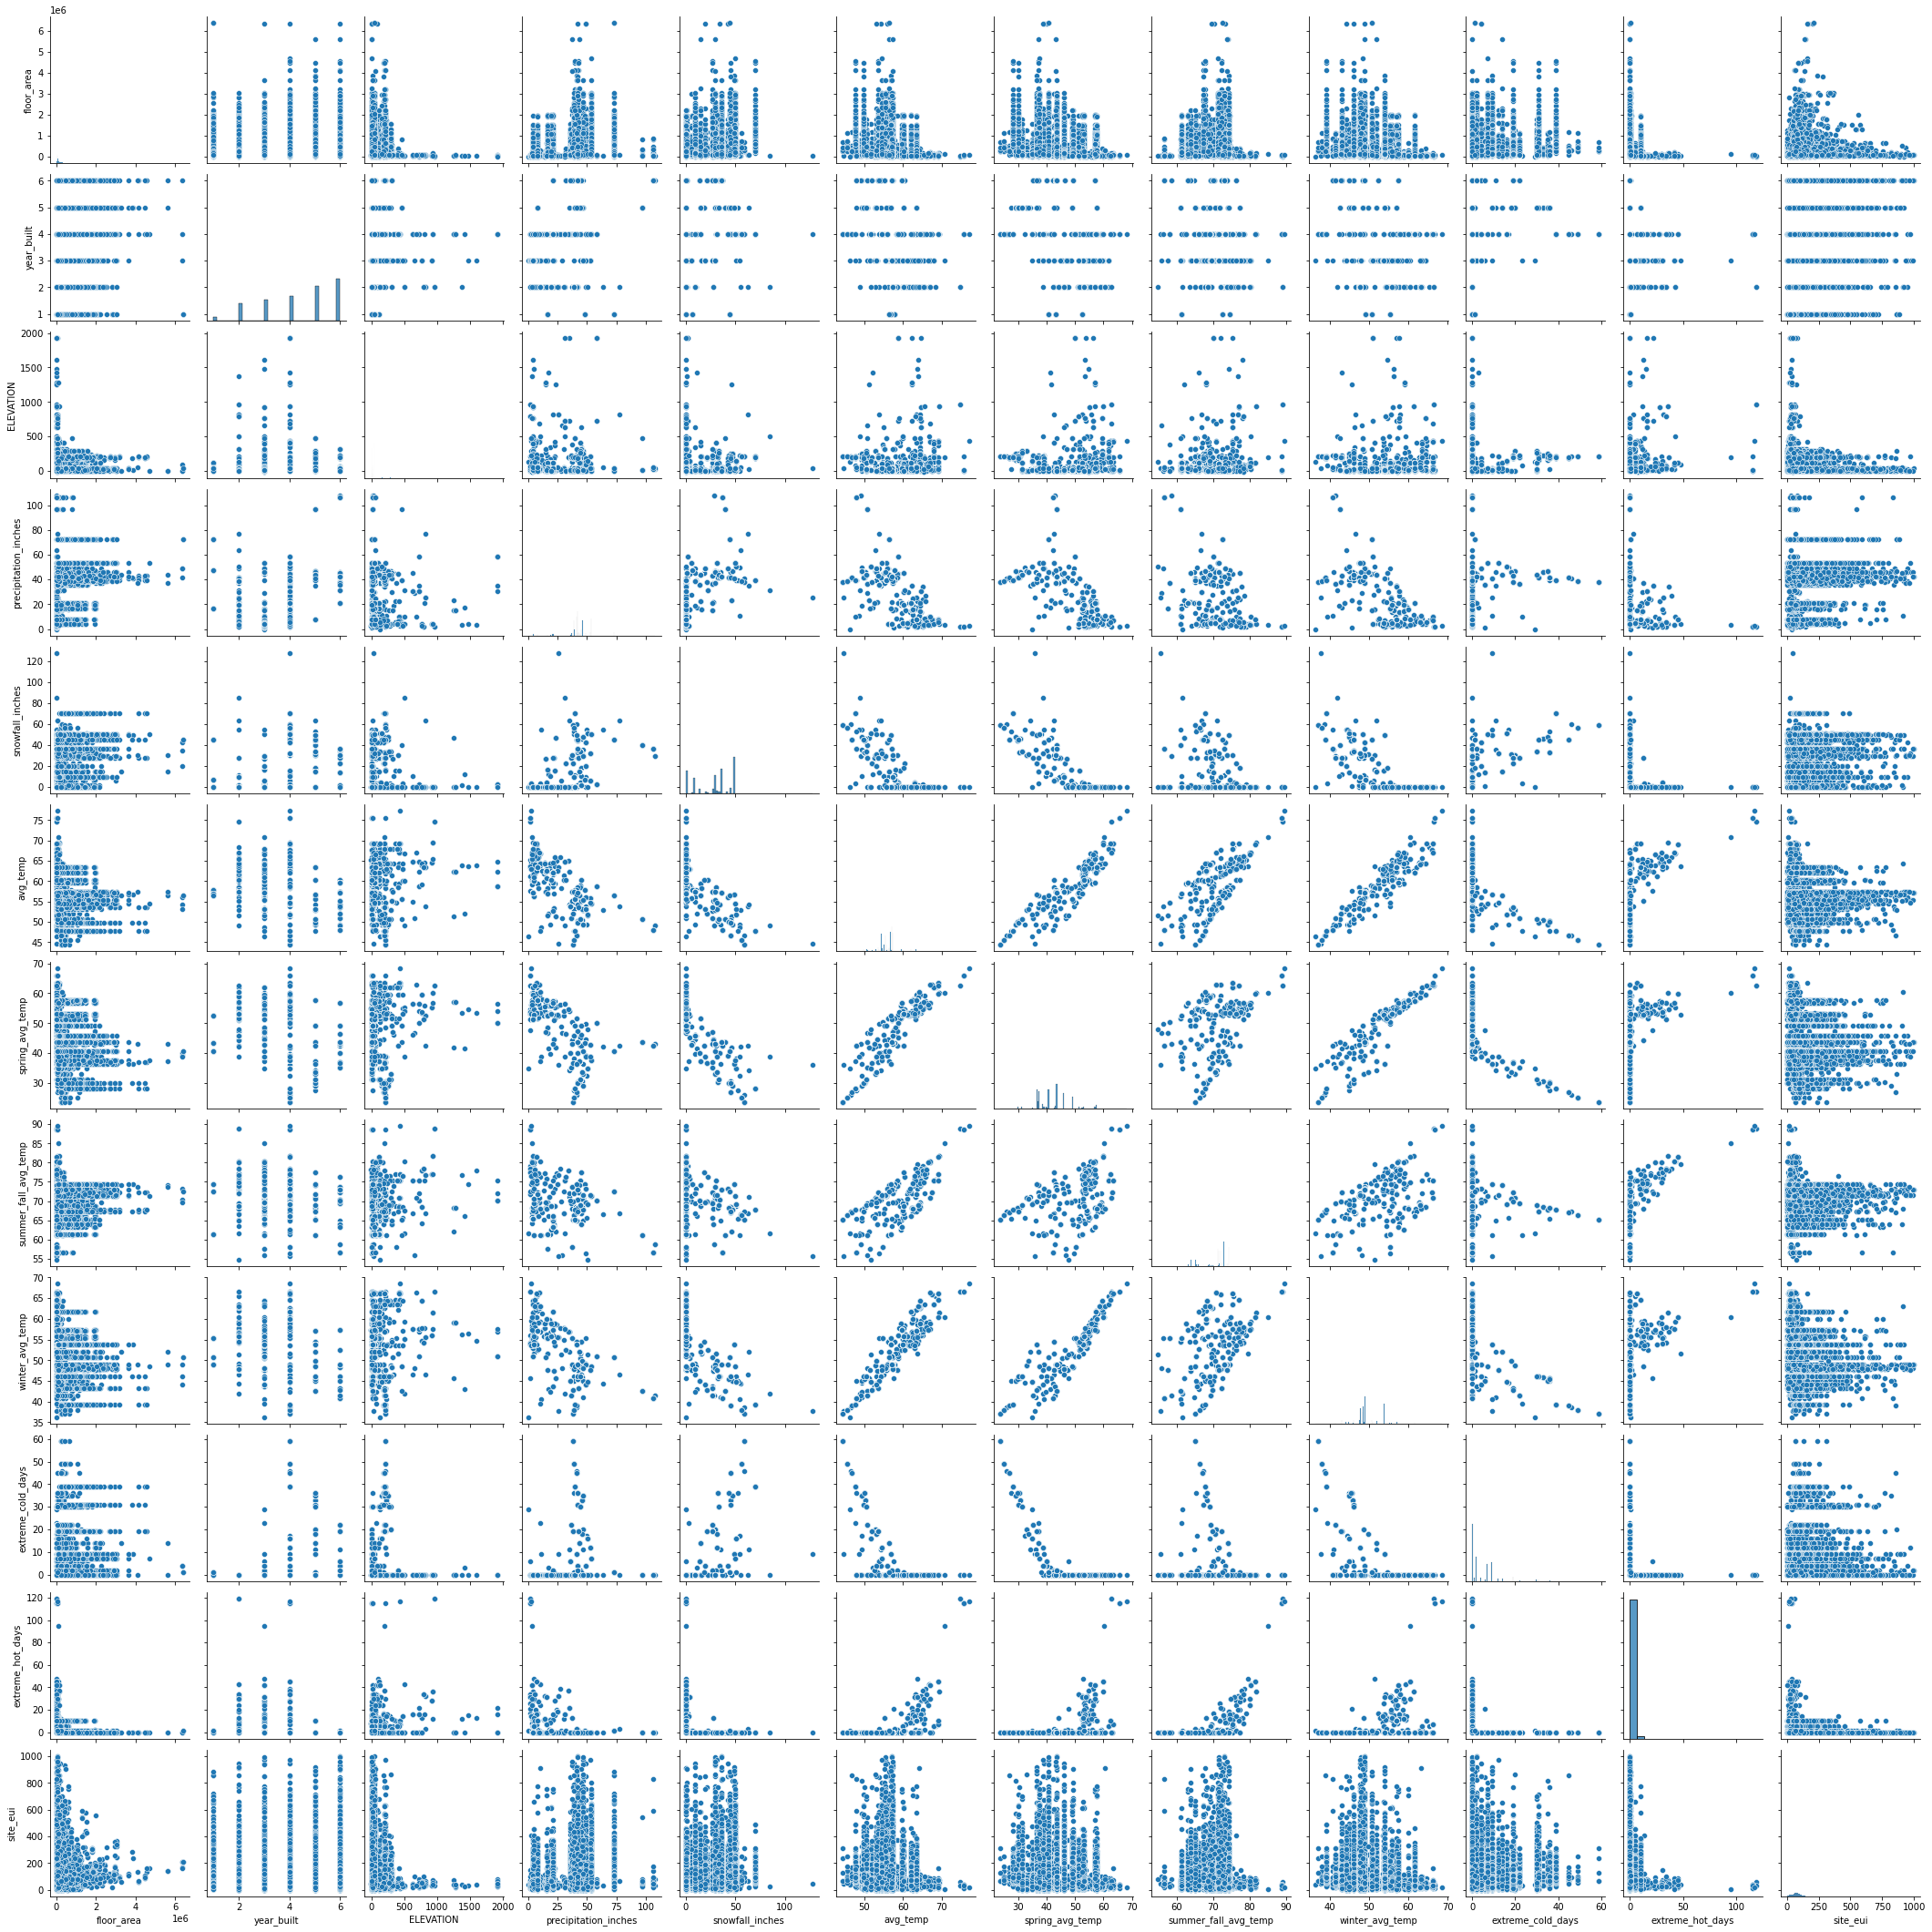

In [41]:
sns.pairplot(train_eda[numerical])

In [42]:
train_eda=train_eda[train_eda['snowfall_inches']<100]

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

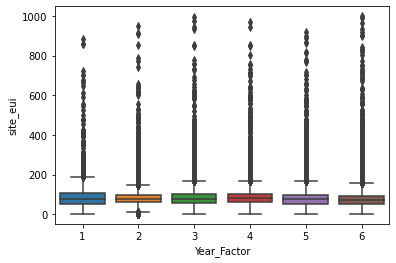

In [43]:
sns.boxplot(x=train_eda['Year_Factor'],y=train_eda['site_eui'])

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

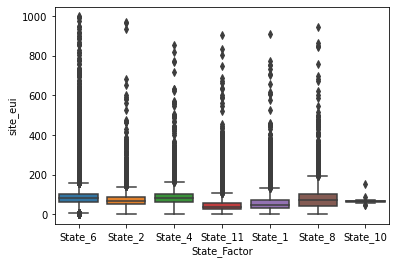

In [44]:
sns.boxplot(x=train_eda['State_Factor'],y=train_eda['site_eui'])

In [45]:
# removing outliers

train_eda=train_eda.drop(train_eda[(train_eda['State_Factor'] == 'State_2') & (train_eda['site_eui'] > 800)].index)
train_eda=train_eda.drop(train_eda[(train_eda['State_Factor'] == 'State_1') & (train_eda['site_eui'] > 800)].index)

<AxesSubplot:xlabel='facility_type', ylabel='site_eui'>

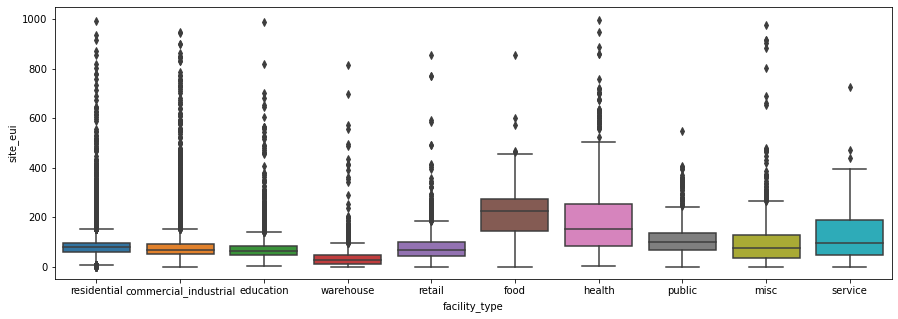

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train_eda['facility_type'],y=train_eda['site_eui'])

In [47]:
train_eda=train_eda.drop(train_eda[(train_eda['facility_type'] == 'food') & (train_eda['site_eui'] > 700)].index)
train_eda=train_eda.drop(train_eda[(train_eda['facility_type'] == 'public') & (train_eda['site_eui'] > 450)].index)
train_eda=train_eda.drop(train_eda[(train_eda['facility_type'] == 'service') & (train_eda['site_eui'] > 600)].index)
train_eda=train_eda.drop(train_eda[(train_eda['facility_type'] == 'retail') & (train_eda['site_eui'] > 700)].index)
train_eda=train_eda.drop(train_eda[(train_eda['facility_type'] == 'education') & (train_eda['site_eui'] > 900)].index)

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

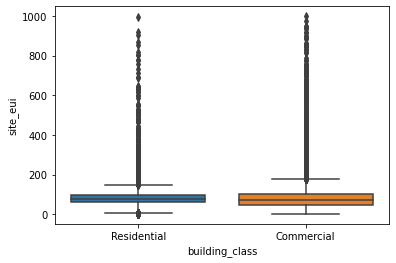

In [48]:
sns.boxplot(x=train_eda['building_class'],y=train_eda['site_eui'])

In [49]:
data_updated=data_updated[data_updated['set'] != 'train']

In [50]:
data_updated= pd.concat([train_eda,data_updated],axis=0)

# 4. Model Preprocessing
Encoding categorical variables and scaling numerical variables


In [51]:
data_updated = pd.concat([data_updated , pd.get_dummies(data_updated['State_Factor'], prefix='state_factor')], axis=1)
data_updated  = pd.concat([data_updated , pd.get_dummies(data_updated['building_class'], prefix='building_class')], axis=1)
data_updated  = pd.concat([data_updated , pd.get_dummies(data_updated['facility_type'], prefix='facility_type')], axis=1)

In [52]:
data_updated = data_updated.drop(['State_Factor','building_class','facility_type'],axis=1)

In [53]:
train=data_updated[data_updated['set']=='train']
val=data_updated[data_updated['set']=='val']
test=data_updated[data_updated['set']=='test']


In [54]:
y_train=train['site_eui']
X_train=train.drop(['site_eui','id','set'],axis=1)
y_val=val['site_eui']
X_val=val.drop(['site_eui','id','set'],axis=1)
y_test=test['site_eui']
X_test=test.drop(['site_eui','id','set'],axis=1)

In [55]:
numerical_features=['floor_area', 'year_built', 'ELEVATION', 'precipitation_inches',
       'snowfall_inches', 'avg_temp',
       'spring_avg_temp', 'summer_fall_avg_temp', 'winter_avg_temp',
       'extreme_cold_days', 'extreme_hot_days']

In [56]:
features_to_scale_train=X_train[numerical_features]
features_to_scale_val=X_val[numerical_features]
features_to_scale_test=X_test[numerical_features]

In [57]:
scaler = StandardScaler()
scaled_features_train=scaler.fit_transform(features_to_scale_train.values)
scaled_features_val=scaler.transform(features_to_scale_val.values)
scaled_features_test=scaler.transform(features_to_scale_test.values)

In [58]:
X_train[numerical_features]=scaled_features_train
X_val[numerical_features]=scaled_features_val
X_test[numerical_features]=scaled_features_test

# 5. Model Building

In [59]:
We use the RFECV method to 

SyntaxError: invalid syntax (<ipython-input-59-cb6331aa2072>, line 1)

In [60]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import RFECV

In [61]:
def train_model(model, X_train, y_train):
          
    rfe = RFECV(estimator=model)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    wrapped_model = TransformedTargetRegressor(regressor=model, transformer=StandardScaler())
    
    # evaluate model
    n_scores = cross_val_score(wrapped_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
    cv_score = np.abs(np.mean(n_scores))
    #return np.sqrt(cv_score)
    print("CV Root Mean Square Errors [RMSE] :", np.sqrt(cv_score))

In [62]:
def evaluate(model, X_train, y_train, X_val,y_val):
    rfe = RFECV(estimator=model)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    wrapped_model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
    wrapped_model.fit(X_train.values, y_train)
    y_pred = wrapped_model.predict(X_val.values)
    MSE = mean_squared_error(y_val, y_pred) 
    RMSE =  np.sqrt(MSE)
    print('Root Mean Squared Error Value for validation set is : ',RMSE)

In [83]:
def predict(model):  
    rfe = RFECV(estimator=model)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    wrapped_model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
    wrapped_model.fit(X_train.values, y_train)
    y_pred = wrapped_model.predict(X_test.values)
    my_submission = pd.DataFrame({'id': test.id, 'site_eui': y_pred})
    # you could use any filename. We choose submission here
    my_submission.to_csv(r'C:\Users\bccpe\Documents\wids\submission.csv', index=False)

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
train_model(lin_reg, X_train, y_train)

CV Root Mean Square Errors [RMSE] : 51.859307224947244


In [64]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(random_state=42)
train_model(random_forest, X_train, y_train)

CV Root Mean Square Errors [RMSE] : 51.00070263221518


In [66]:
import xgboost as xg
xg_boost=xg.XGBRegressor(random_state = 42)
train_model(xg_boost,X_train,y_train)

CV Root Mean Square Errors [RMSE] : 47.76438693302501


In [67]:
import optuna
def objective(trial,data=X_train,target=y_train):
    

    param = {
        'tree_method':'gpu_hist',  # Use GPU acceleration
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_categorical("n_estimators", [150, 200, 300, 3000]),
        'max_depth': trial.suggest_categorical('max_depth', [4,5,7,9,11,13,15,17]),
        'random_state': 42,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xg.XGBRegressor(**param)  

    wrapped_model = TransformedTargetRegressor(regressor=model, transformer=StandardScaler())
    
    # evaluate model
    n_scores = cross_val_score(wrapped_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
    cv_score = np.abs(np.mean(n_scores))
    
    #model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    #preds = model.predict(test_x)
    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    
    return (np.sqrt(cv_score))

In [68]:

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print(f"{'best objective value'} : {study.best_value}")

[I 2022-02-18 07:48:48,384] A new study created in memory with name: no-name-b2f7b344-5c51-4e7f-ba37-b4592b58a6bc
[I 2022-02-18 07:49:13,909] Trial 0 finished with value: 50.042005217559854 and parameters: {'lambda': 0.004171433140213676, 'alpha': 0.397194262532559, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.02, 'n_estimators': 150, 'max_depth': 13, 'min_child_weight': 22}. Best is trial 0 with value: 50.042005217559854.
[I 2022-02-18 07:49:22,292] Trial 1 finished with value: 50.848907567203 and parameters: {'lambda': 0.0018673857367982633, 'alpha': 0.013641152142202644, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.014, 'n_estimators': 300, 'max_depth': 7, 'min_child_weight': 135}. Best is trial 0 with value: 50.042005217559854.
[I 2022-02-18 07:49:25,626] Trial 2 finished with value: 52.41315161421258 and parameters: {'lambda': 0.6958457370893937, 'alpha': 0.0034352436377104133, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.008, 'n_

Number of finished trials: 5
Best trial: {'lambda': 0.004171433140213676, 'alpha': 0.397194262532559, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.02, 'n_estimators': 150, 'max_depth': 13, 'min_child_weight': 22}
best objective value : 50.042005217559854


# 6. Evaluation

The untuned xgboost seems to do best on the training set. Now lets us check the performance on the validation set to decide which model to use

In [69]:
evaluate(lin_reg, X_train, y_train, X_val,y_val)

Root Mean Squared Error Value for validation set is :  54.13056645193553


In [70]:
evaluate(random_forest, X_train, y_train, X_val,y_val)

Root Mean Squared Error Value for validation set is :  43.696045686844


In [72]:
evaluate(xg_boost, X_train, y_train, X_val,y_val)

Root Mean Squared Error Value for validation set is :  48.8156182122564


We choose random forest, as it has the best score on the validation set

In [82]:
predict(random_forest)